BINARY CLASSIFICATION USING NEURAL NETWORK 

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

import pandas as pd

import numpy as np
from numpy import vstack

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc 

import torch
import torch.nn as nn
import torch.optim as optim

from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn.init import xavier_uniform_
from torch.nn.init import kaiming_uniform_


from torch.utils.data import Dataset, DataLoader

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


 ▶  Importation du jeu d'entrainement & de test :

In [ ]:
df_train = pd.read_csv ("/content/gdrive/My Drive/Colab Notebooks/CHURN/churner_train_data_set.csv")
df_test = pd.read_csv ("/content/gdrive/My Drive/Colab Notebooks/CHURN/churner_test_data_set.csv")


 
 
 ▶ Analyse de la distribution de la variable "churn"
-  Environ 1/10 de churner par jeu 

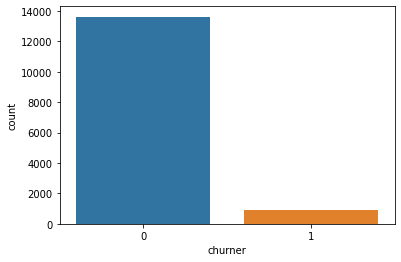

In [ ]:
#sns.countplot(x = "churner", data=df_train)
sns.countplot(x = "churner", data=df_test)

 ▶ Définition de DataLoader particulier 
 - 3 composants principals :    
- __ init __ : initialise les opérations qui "lit" les données
- __ getitem __ : renvoi la valeur d'un batch
- __ len __ : renvoi la taille de la donnée en input

In [ ]:
class TrainData(Dataset):
  def __init__(self, x_data, y_data):
    self.x_data = x_data
    self.y_data = y_data

  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]

  def __len__(self):
    return len(self.x_data)

class TestData(Dataset):
  def __init__(self, x_data, y_data):
    self.x_data = x_data
    self.y_data = y_data

  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]

  def __len__(self):
    return len(self.x_data)



In [ ]:
class NN(nn.Module):

  def __init__(self, INPUT_SIZE, OUTPUT_SIZE):
    super(NN, self).__init__()

    self.layer_1 = nn.Linear(INPUT_SIZE, 50)

    #self.layer_2 = nn.Linear(50, 50)

    self.layer_out = nn.Linear(50, OUTPUT_SIZE)
    


  def forward(self, inputs):
    
    x = torch.relu(self.layer_1(inputs))
    #x = torch.relu(self.layer_2(x))
    x = torch.sigmoid(self.layer_out(x))
    
    return x


In [ ]:
class MLP(nn.Module):
    # define model elements
    def __init__(self, n_inputs, output_size):
        super(MLP, self).__init__()

        # input to first hidden layer
        self.hidden1 = nn.Linear(n_inputs, 100)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()

        # second hidden layer
        self.hidden2 = nn.Linear(000, 100)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        self.dropout2 = nn.Dropout(p = 0.1)

        self.hidden3 = nn.Linear(100, 100)
        kaiming_uniform_(self.hidden3.weight, nonlinearity='relu')
        self.act3 = ReLU()
        self.dropout3 = nn.Dropout(p = 0.1)

        self.hidden4 = nn.Linear(100, 8)
        kaiming_uniform_(self.hidden4.weight, nonlinearity='relu')
        self.act4 = ReLU()
        self.dropout4 = nn.Dropout(p = 0.1)

        # third hidden layer and output
        self.hidden5 = nn.Linear(8, output_size)
        xavier_uniform_(self.hidden5.weight)
        self.act5 = Sigmoid()
 
    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.dropout2(X)

        X = self.hidden3(X)
        X = self.act3(X)
        X = self.dropout3(X)

        X = self.hidden4(X)
        X = self.act4(X)
        X = self.dropout4(X)

        # third hidden layer and output
        X = self.hidden5(X)
        X = self.act5(X)
        return X

In [ ]:
def train_model(EPOCHS, model, train_loader):
  model.train()
  for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    losses = np.zeros(EPOCHS+1)
    for x_batch, y_batch in train_loader:
      optimizer.zero_grad()

      y_pred = model(x_batch)
      #for element in y_pred :
      #  print(element)

      loss = criterion(y_pred, y_batch.reshape(-1,1))

      losses[e] = loss

      predicted = model(torch.tensor(x_train, dtype=torch.float32))
      acc = (predicted.reshape(-1).detach().numpy().round()==y_train).mean()
      #accc = acc(y_pred, y_batch.unsqueeze(1))

      # calcul du gradient (et retropropagation) ? ? ?? ? ? 
      loss.backward()
      # maj des poids synaptiques ? ? ?? ? ? 
      optimizer.step()

      epoch_loss += loss.item()
      #epoch_acc += accc.item()
      epoch_acc += acc

    print(f'Epoch {e+0:03}:| Loss: {epoch_loss/len(train_loader):.5f} | Acc : {epoch_acc/len(train_loader):.3f}')
  return losses


In [ ]:
x_train = df_train.iloc[:, 1:-1]
y_train = df_train.iloc[:, -1]
x_test = df_test.iloc[:, 1:-1] 
y_test = df_test.iloc[:, -1]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(57996, 131) (57996,) (14499, 131) (14499,)


In [ ]:
#means = x_train.mean()
#std = x_train.std()
#x_train = x_train - means
#x_train = x_train / std
#x_test = x_test - means
#x_test = x_test / std

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [ ]:
INPUT_SIZE = 131
OUTPUT_SIZE = 1
EPOCHS = 200
BATCH_SIZE = 1024
LEARNING_RATE = 0.01
MOMENTUM = 0.9

In [ ]:
train_data = TrainData(torch.FloatTensor(x_train), torch.FloatTensor(y_train))
test_data = TestData(torch.FloatTensor(x_test), torch.FloatTensor(y_test))

train_loader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = True)

In [ ]:
model = NN(INPUT_SIZE, OUTPUT_SIZE)
print(model)
model = MLP(INPUT_SIZE, OUTPUT_SIZE)
print(model)

NN(
  (layer_1): Linear(in_features=131, out_features=50, bias=True)
  (layer_out): Linear(in_features=50, out_features=1, bias=True)
)
MLP(
  (hidden1): Linear(in_features=131, out_features=1000, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=1000, out_features=1000, bias=True)
  (act2): ReLU()
  (dropout2): Dropout(p=0.1, inplace=False)
  (hidden3): Linear(in_features=1000, out_features=1000, bias=True)
  (act3): ReLU()
  (dropout3): Dropout(p=0.1, inplace=False)
  (hidden4): Linear(in_features=1000, out_features=8, bias=True)
  (act4): ReLU()
  (dropout4): Dropout(p=0.1, inplace=False)
  (hidden5): Linear(in_features=8, out_features=1, bias=True)
  (act5): Sigmoid()
)


In [ ]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum = MOMENTUM)

In [ ]:
losses = train_model(EPOCHS, model, train_loader)

#train_model2(EPOCHS, model, train_loader)

print(losses) 

plt.plot(np.array(losses), 'r')
plt.title("Evolution de la fonction de perte")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.show()

Epoch 001:| Loss: 0.26113 | Acc : 0.926
Epoch 002:| Loss: 0.19552 | Acc : 0.937
Epoch 003:| Loss: 0.18717 | Acc : 0.937
Epoch 004:| Loss: 0.18080 | Acc : 0.937
Epoch 005:| Loss: 0.17987 | Acc : 0.937
Epoch 006:| Loss: 0.17470 | Acc : 0.937
Epoch 007:| Loss: 0.17287 | Acc : 0.937
Epoch 008:| Loss: 0.16952 | Acc : 0.937
Epoch 009:| Loss: 0.16888 | Acc : 0.937
Epoch 010:| Loss: 0.16585 | Acc : 0.937
Epoch 011:| Loss: 0.16489 | Acc : 0.937
Epoch 012:| Loss: 0.16218 | Acc : 0.937
Epoch 013:| Loss: 0.16077 | Acc : 0.938
Epoch 014:| Loss: 0.15790 | Acc : 0.939
Epoch 015:| Loss: 0.15775 | Acc : 0.940
Epoch 016:| Loss: 0.15518 | Acc : 0.940
Epoch 017:| Loss: 0.15438 | Acc : 0.941
Epoch 018:| Loss: 0.15228 | Acc : 0.942
Epoch 019:| Loss: 0.15214 | Acc : 0.942
Epoch 020:| Loss: 0.14863 | Acc : 0.942
Epoch 021:| Loss: 0.14850 | Acc : 0.942
Epoch 022:| Loss: 0.14825 | Acc : 0.943
Epoch 023:| Loss: 0.14564 | Acc : 0.943
Epoch 024:| Loss: 0.14328 | Acc : 0.943
Epoch 025:| Loss: 0.14232 | Acc : 0.944


In [ ]:
#eval_model(model, test_loader)

In [ ]:
pred, actuals = list(), list()
for i, (x, y) in enumerate(test_loader):
  y_pred = model(x)
  y_pred = y_pred.detach().numpy()
  
  actual = y.numpy()
  actual = actual.reshape((len(actual), 1))

  y_pred = y_pred.round()

  pred.append(y_pred)
  actuals.append(actual)
pred, actuals = vstack(pred), vstack(actuals)


acc = accuracy_score(actuals, pred)
print(acc)


cm = confusion_matrix(actuals, pred)

cm_matrix = pd.DataFrame(data=cm, columns=[ ' Normal case: 0','Actual case: 1'],  

                                 index=[ 'Predict normal case: 0','Predict case: 1']) 

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu') 


In [ ]:
AUC=accuracy_score(actuals, pred)
fpr_keras, tpr_keras, thresholds_keras=roc_curve(actuals,pred) 
plt.plot(fpr_keras,tpr_keras,label='Keras Model(area={:.3f})'.format(AUC)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC curve') 
plt.legend(loc='best') 
plt.show() 